<a href="https://colab.research.google.com/github/Jaypardeshii/Fraudulent-Transaction-Prediction/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing librarys..

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble
from collections import Counter
from prettytable import PrettyTable


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Fraud.csv')

##Dataset overview

In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df['nameOrig'].nunique()

6353307

In [ ]:
df['nameDest'].nunique()

2722362

##Data Cleaning

In [ ]:
# Counting missing value
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
# cheking for duplicate value
len(df[df.duplicated()])

0

<function matplotlib.pyplot.show(*args, **kw)>

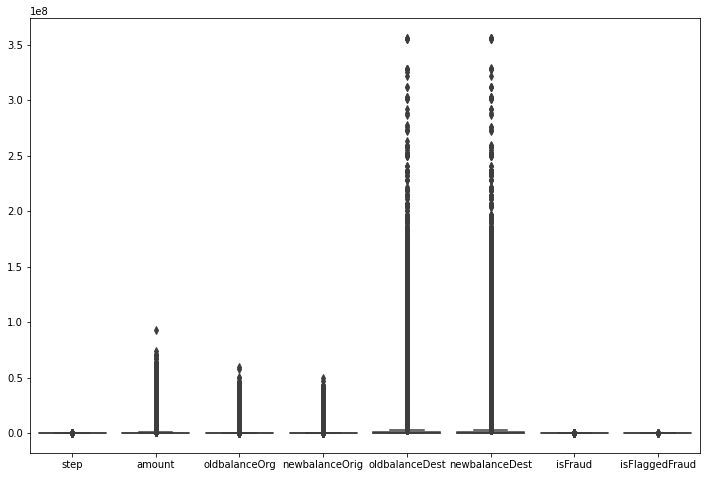

In [ ]:
# cheking for outliers
plt.figure(figsize = (12,8))
sns.boxplot(data=df)
plt.show

##EDA

In [ ]:
df.groupby(['isFraud'])['isFraud'].count()

isFraud
0    6354407
1       8213
Name: isFraud, dtype: int64

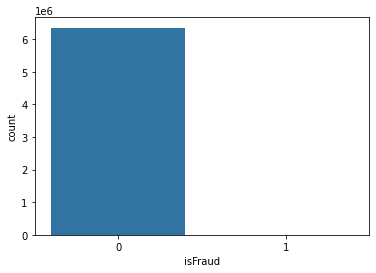

In [ ]:
sns.countplot(x='isFraud', data=df)

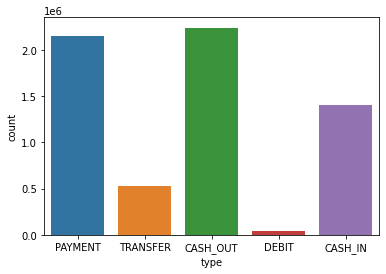

In [ ]:
sns.countplot(df['type'])

In [ ]:
#creating a copy of original dataset to train and test models

new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


##Label Encoding

In [ ]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
objList = objList.drop(['type'])
print(objList)

Index(['nameOrig', 'nameDest'], dtype='object')


In [ ]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 534.0+ MB
None


In [ ]:
new_df['Payment'] = new_df['type'].apply(lambda x : 1 if x == "PAYMENT" else 0)
new_df['Transfer'] = new_df['type'].apply(lambda x : 1 if x == "TRANSFER" else 0)
new_df['Debit'] = new_df['type'].apply(lambda x : 1 if x == "DEBIT" else 0)
new_df['Cash_in'] = new_df['type'].apply(lambda x : 1 if x == "CASH_IN" else 0)
new_df['Cash_out'] = new_df['type'].apply(lambda x : 1 if x == "CASH_OUT" else 0)


In [ ]:
new_df = new_df.drop(['type'],axis=1)

In [ ]:
new_df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Payment,Transfer,Debit,Cash_in,Cash_out
0,1,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,1,0,0,0,0
1,1,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,1,0,0,0,0
2,1,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,0,1,0,0,0
3,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,0,0,0,0,1
4,1,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,1,0,0,0,0


##MULTICOLINEARITY

In [ ]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,1.003450
1,amount,4.075424
2,nameOrig,1.000003
3,oldbalanceOrg,669.075449
4,newbalanceOrig,688.656884
5,nameDest,3.794008
6,oldbalanceDest,68.603161
7,newbalanceDest,79.000141
8,isFraud,1.226091
9,isFlaggedFraud,1.002820


We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

Thus combine these pairs of collinear attributes and drop the individual ones

In [ ]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,amount,3.980427
1,isFraud,1.225035
2,isFlaggedFraud,1.002775
3,Payment,3.241016
4,Transfer,1.515456
5,Debit,1.022453
6,Cash_in,2.395463
7,Cash_out,2.251929
8,Actual_amount_orig,1.720037
9,Actual_amount_dest,3.862224


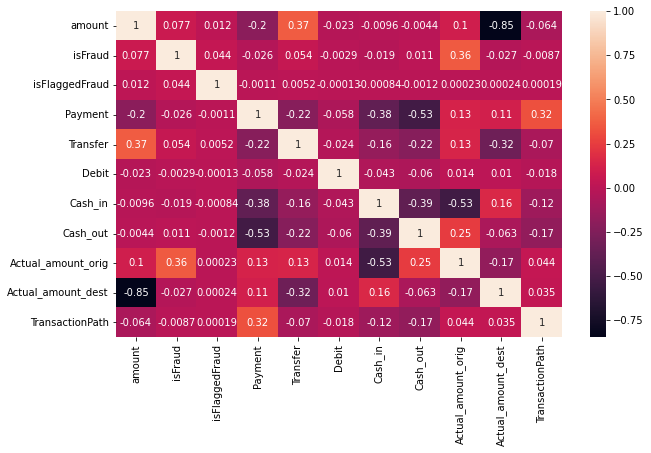

In [ ]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

## Data Pre-processing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [ ]:
# Defining dependent and independent variables
Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

In [ ]:
# function to get recall score
def recall(actual,predicted):
  '''
  recall(actual,predicted)
  '''
  return recall_score(y_true=actual, y_pred=predicted, average='binary')

In [ ]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y, shuffle=True)

In [ ]:
# Checking the train distribution of dependent variable
Y_train.value_counts()

0    4448085
1       5749
Name: isFraud, dtype: int64

In [ ]:
# Proportion of positive outcomes in train dataset
5749/(5749+4448085)

0.001290797995614565

In [ ]:
# Checking the test distribution of dependent variable
Y_test.value_counts()

0    1906322
1       2464
Name: isFraud, dtype: int64

####**Oversampling:**

Since we are dealing with unbalanced data, ie, only ~15% of the patients were diagnosed with coronary heart disease, we oversample the train dataset using SMOTE (Synthetic Minority Oversampling Technique). This ensures that the model has trained equally on all kinds of results, and it is not biased to one particular result.

In [ ]:
# Oversampling using SMOTE
smote = SMOTE()

# fit predictor and target variable
X_smote, Y_smote = smote.fit_resample(X_train, Y_train)

print('Samples in the original dataset', len(Y_train))
print('Samples in the resampled dataset', len(Y_smote))

Samples in the original dataset 4453834
Samples in the resampled dataset 8896170


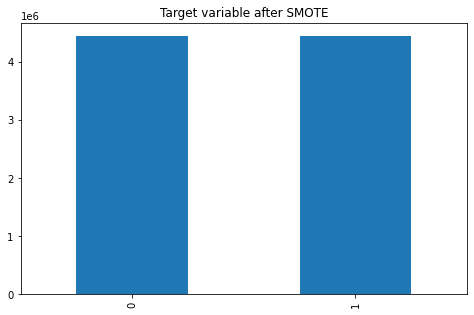

In [ ]:
# visualize the target variable after SMOTE
plt.figure(figsize = (8,5))
Y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')

After Oversampling now data is balanced 

In [ ]:
# Scaling data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_smote_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

# Converting array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_smote_scaled = pd.DataFrame(X_smote_scaled,columns=X_smote.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
# Scaled train values
X_train_scaled.head()

,amount,isFlaggedFraud,Payment,Transfer,Debit,Cash_in,Cash_out,Actual_amount_orig,Actual_amount_dest,TransactionPath
0,-0.173422,-0.001422,-0.714928,-0.302321,-0.080755,-0.530839,1.357706,0.145936,-1.242690,0.416244
1,-0.232225,-0.001422,-0.714928,-0.302321,-0.080755,-0.530839,1.357706,0.218997,0.104511,1.020238
2,-0.285459,-0.001422,1.398742,-0.302321,-0.080755,-0.530839,-0.736536,0.149359,0.151810,-0.068414
3,-0.153190,-0.001422,-0.714928,-0.302321,-0.080755,1.883810,-0.736536,-0.450697,0.257712,0.215004
4,0.212073,-0.001422,-0.714928,-0.302321,-0.080755,1.883810,-0.736536,-1.976514,0.444801,0.190520


In [ ]:
# scaled SMOTE values
X_smote_scaled.head()

,amount,isFlaggedFraud,Payment,Transfer,Debit,Cash_in,Cash_out,Actual_amount_orig,Actual_amount_dest,TransactionPath
0,-0.400934,-0.020867,-0.451509,-0.618377,-0.057047,-0.351674,1.199654,-0.387841,-0.493098,0.546204
1,-0.420418,-0.020867,-0.451509,-0.618377,-0.057047,-0.351674,1.199654,-0.381998,0.266131,1.164052
2,-0.438056,-0.020867,2.214798,-0.618377,-0.057047,-0.351674,-0.833573,-0.387567,0.292787,0.050429
3,-0.394231,-0.020867,-0.451509,-0.618377,-0.057047,2.843543,-0.833573,-0.435560,0.352469,0.340348
4,-0.273206,-0.020867,-0.451509,-0.618377,-0.057047,2.843543,-0.833573,-0.557597,0.457905,0.315302


## **Model Implementation**




## Logistic Regression

In [ ]:
# Fitting model
lr_model = LogisticRegression()

In [ ]:
# training the model
lr_model.fit(X_smote_scaled, Y_smote)

LogisticRegression()

In [ ]:
# Train predictions
lr_train_pred = lr_model.predict(X_smote_scaled)